# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives
+5. Applicants with higher income per person in the family (considering #of dependents)
+6. Applicants with lower loan amount in application
+7. Applicants with high savings (data not provided here)

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration (EDA)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv(r"C:\Users\Irene\lighthouse-data-notes\week7\mini_proj4\data\data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df['Credit_History'].value_counts() #Imbalanced data

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [7]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [8]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [9]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [10]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [11]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [12]:
df[df["Loan_Status"] == 'Y'].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,422.000000,422.000000,411.000000,414.000000,385.000000
mean,5384.068720,1504.516398,144.294404,341.072464,0.981818
std,5765.441615,1924.754855,85.484607,63.247770,0.133782
min,210.000000,0.000000,17.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1239.500000,126.000000,360.000000,1.000000
75%,5771.500000,2297.250000,161.000000,360.000000,1.000000
max,63337.000000,20000.000000,700.000000,480.000000,1.000000


In [13]:
df.loc[(df["Loan_Status"] == 'Y') & (df.Credit_History != 1)].sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
279,LP001908,Female,Yes,0,Not Graduate,No,4100,0.0,124.0,360.0,NaN,Rural,Y


### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.




Look at box plots to understand the distributions. 

Look at the distribution of income segregated  by `Education`

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

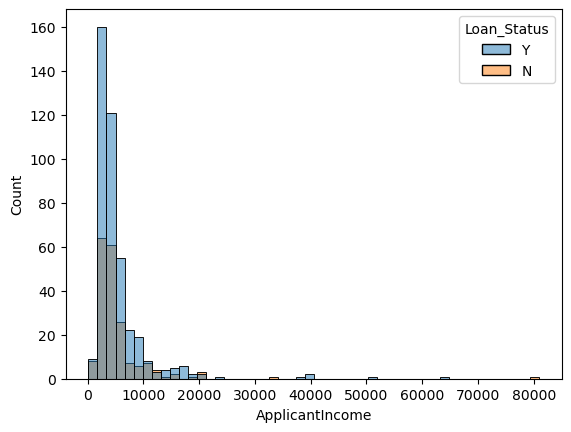

In [14]:
import seaborn as sns

# Plot the histogram thanks to the distplot function
sns.histplot(data=df, x="ApplicantIncome", hue="Loan_Status", bins=50)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

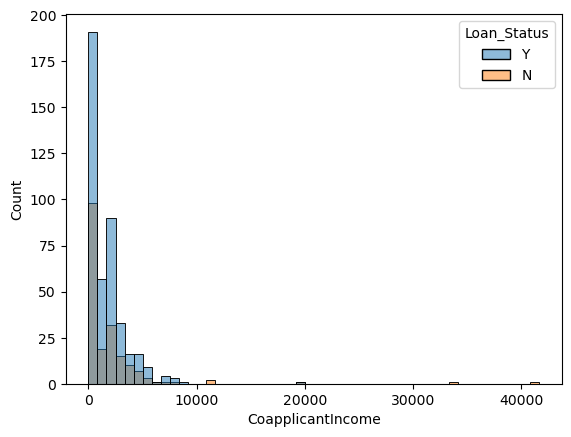

In [15]:
sns.histplot(data=df, x="CoapplicantIncome",  hue="Loan_Status", bins=50)

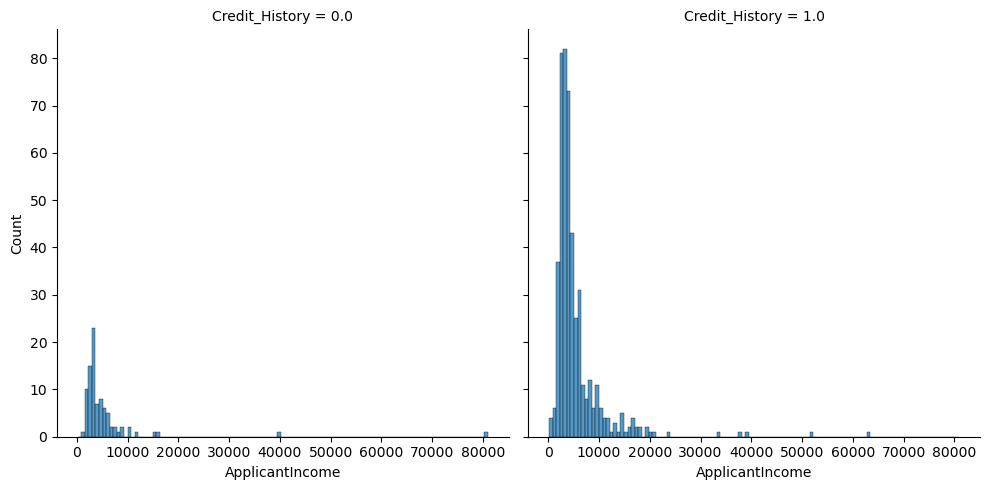

In [16]:
import seaborn as sns
sns.displot(x=df['ApplicantIncome'], col=df['Credit_History'])

Look at the histogram and boxplot of LoanAmount

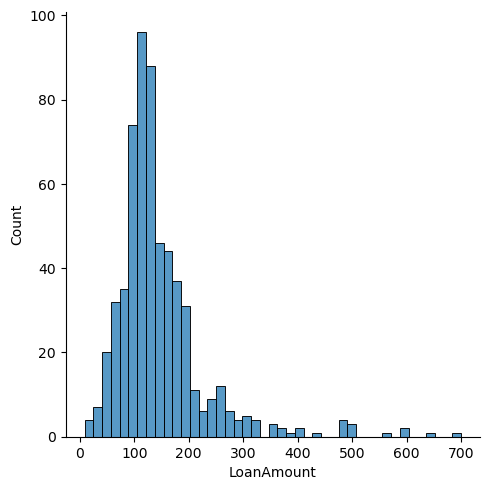

In [17]:
sns.displot(x=df['LoanAmount'])

In [18]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

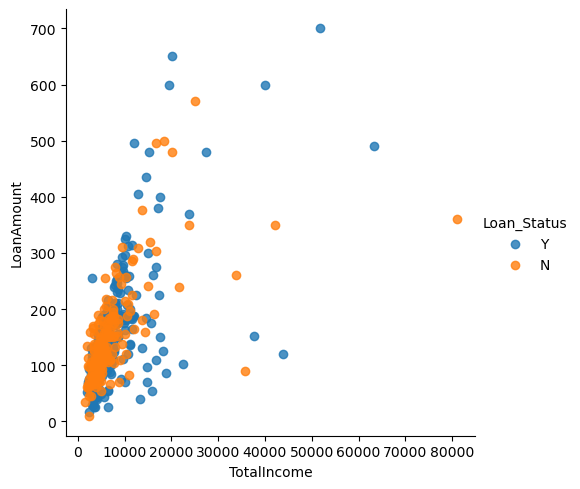

In [19]:
# scatterplot to see relationship between total applicants' income and Loan amount by loan status
sns.lmplot(x="TotalIncome", y="LoanAmount", data=df, fit_reg=False, hue='Loan_Status', legend=True)
plt.show()

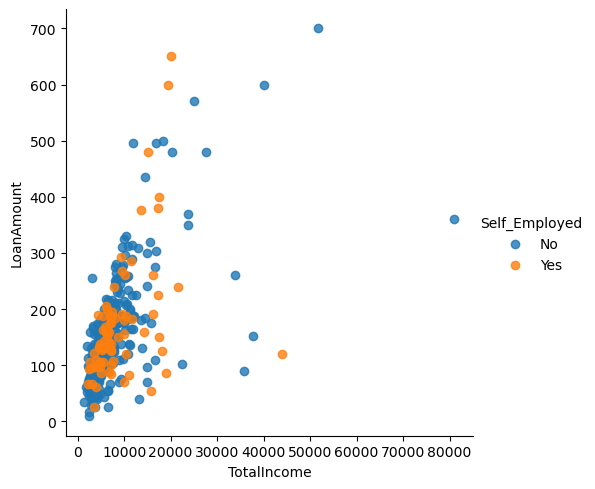

In [20]:
# scatterplot to see relationship between total applicants' income and self-employed status by loan status
sns.lmplot(x="TotalIncome", y="LoanAmount", data=df, fit_reg=False, hue='Self_Employed', legend=True)
plt.show()

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

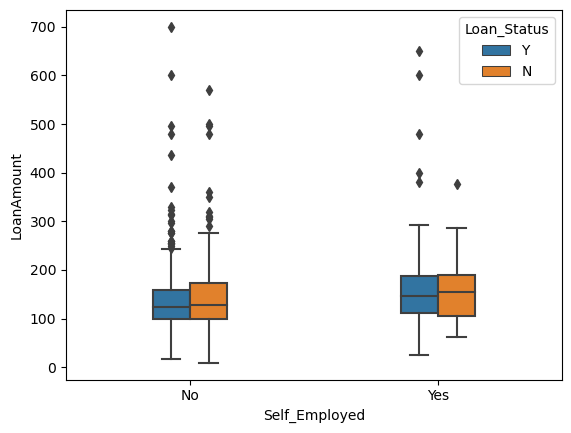

In [21]:
sns.boxplot(x=df["Self_Employed"], y=df["LoanAmount"], hue=df["Loan_Status"], width=0.3)

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [22]:
import numpy as np
table = pd.pivot_table(df, values='ApplicantIncome', index=['Loan_Status', 'Credit_History','Property_Area'], aggfunc=np.mean)
table

ApplicantIncome
Loan_Status Credit_History Property_Area                 
N           0.0            Rural              7349.153846
                           Semiurban          4036.384615
                           Urban              4845.633333
            1.0            Rural              6239.102564
                           Semiurban          6626.826087
                           Urban              4251.685714
Y           0.0            Rural              3700.000000
                           Semiurban         13086.000000
                           Urban              4333.000000
            1.0            Rural              5029.316327
                           Semiurban          5214.018293
                           Urban              5905.836207

In [23]:
table2 = pd.pivot_table(df, values='LoanAmount', index=['Loan_Status','Married','Self_Employed'], aggfunc=np.mean)
table2

LoanAmount
Loan_Status Married Self_Employed            
N           No      No             130.967213
                    Yes            138.545455
            Yes     No             162.459770
                    Yes            170.357143
Y           No      No             115.504762
                    Yes            175.250000
            Yes     No             148.696035
                    Yes            180.921053

In [24]:
df['Self_Employed'][df['Self_Employed'].notnull()].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [25]:
df['Loan_Status'][(df['Self_Employed']=='No')].value_counts()

Y    343
N    157
Name: Loan_Status, dtype: int64

In [26]:
#df Self_Employed = 'Yes' and Loan_Status = 'Y'
print("Self_Employed = 'Yes' and Loan_Status = 'Y':", 56/82)
print("Self_Employed = 'No' and Loan_Status = 'Y':", 343/500)

Self_Employed = 'Yes' and Loan_Status = 'Y': 0.6829268292682927
Self_Employed = 'No' and Loan_Status = 'Y': 0.686


In [27]:
# Self_employed seems not so relevant with loan approval

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [28]:
table3 = pd.pivot_table(df, values='Loan_Status', index=['Credit_History'], aggfunc='count')
table3

,Loan_Status
Credit_History,
0.0,89
1.0,475


In [32]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome           0
dtype: int64

In [35]:
df['LoanAmount'].fillna(value=df['LoanAmount'].mean() , inplace=True)
df['Loan_Amount_Term'].fillna(value=df['Loan_Amount_Term'].mean() , inplace=True)

In [37]:
df = df.dropna(axis=0)

In [38]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,7583.0


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

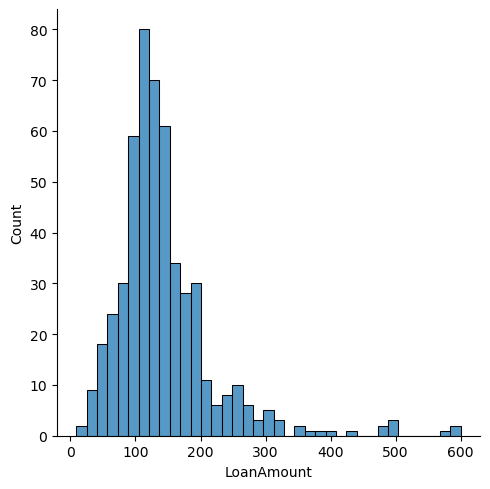

In [39]:
# histogram before transformation
sns.displot(df['LoanAmount'])

In [54]:
df['loan_log'] = np.log(df['LoanAmount'])

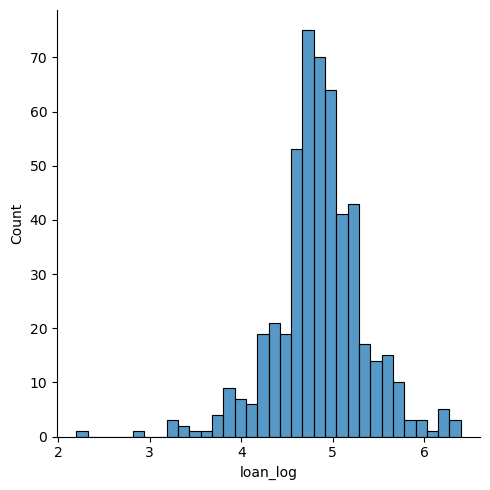

In [55]:
# histogram after transformation
sns.displot(df['loan_log'])

Combine both incomes as total income and take a log transformation of the same.

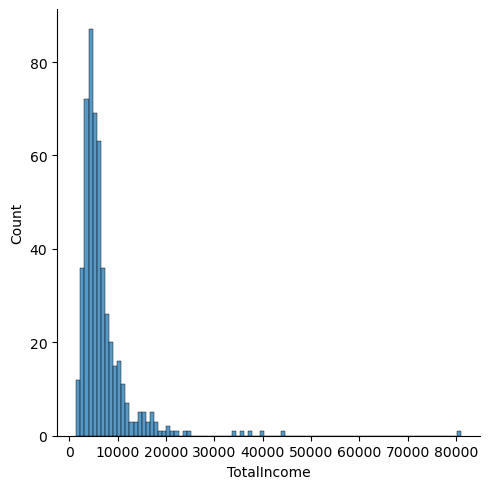

In [42]:
#histogram before transformation
sns.displot(df['TotalIncome'])

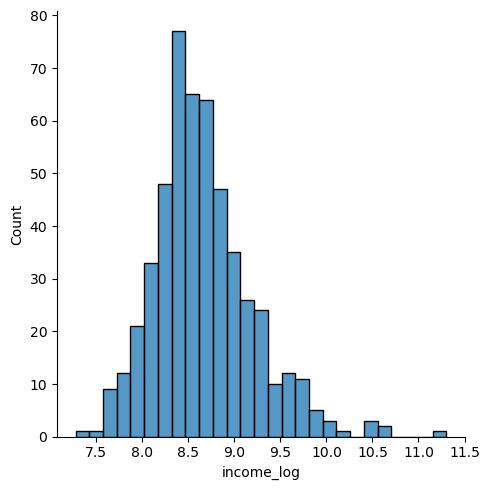

In [56]:
#histogram after transformation
df['income_log'] = np.log(df['TotalIncome'])
sns.displot(df['income_log'])

### Before using pipeline - manual cleansing

In [57]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,loan_log,income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,4.986426,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,2900.0,4.262680,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,4106.0,3.688879,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8312.0,5.533389,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,7583.0,5.231109,8.933664


In [49]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(df['Loan_Status'].values)

In [58]:
X = df.drop(columns=['Loan_Status','Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome'])

In [59]:
X_cat = X[['Gender','Married','Dependents','Education','Credit_History','Property_Area']]
X_num = X[['loan_log','Loan_Amount_Term','income_log']]

In [60]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
X_cat_trans = enc.fit_transform(X_cat)
X_cat_trans

array([[0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled

array([[0.66414213, 0.72972973, 0.34759045],
       [0.63214098, 0.72972973, 0.35765434],
       [0.47442145, 0.72972973, 0.18185333],
       ...,
       [0.79438076, 0.72972973, 0.43482806],
       [0.72240407, 0.72972973, 0.4120421 ],
       [0.64126516, 0.72972973, 0.2870414 ]])

In [62]:
X_concat = np.concatenate((X_num_scaled, X_cat_trans), axis=1)

In [63]:
X_concat

array([[0.66414213, 0.72972973, 0.34759045, ..., 0.        , 0.        ,
        1.        ],
       [0.63214098, 0.72972973, 0.35765434, ..., 1.        , 0.        ,
        0.        ],
       [0.47442145, 0.72972973, 0.18185333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.79438076, 0.72972973, 0.43482806, ..., 0.        , 0.        ,
        1.        ],
       [0.72240407, 0.72972973, 0.4120421 , ..., 0.        , 0.        ,
        1.        ],
       [0.64126516, 0.72972973, 0.2870414 , ..., 0.        , 1.        ,
        0.        ]])

## 4. Feature Engineering

In [45]:
# 1.Already total income created

In [84]:
X_concat.shape

(511, 18)

## 5. Building a Predictive Model

In [64]:
# 1. scaling
# 2. building a model (Logistic Regression, Naive Bayes, Decision Tree/Random Forest, SVM, KNN?)

In [66]:
# Data Splitting 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_concat, y, random_state=27)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score, accuracy_score, roc_auc_score


logreg_clf = LogisticRegression(max_iter=200)
LDA_clf = LinearDiscriminantAnalysis()
KNN_clf = KNeighborsClassifier()
NB_clf = GaussianNB()
DT_clf = DecisionTreeClassifier()
SVM_clf = SVC()
xgb_clf = xgb.XGBClassifier()
RF_clf = RandomForestClassifier(max_depth=2, random_state=0)

In [80]:
# Logistic regression
logreg_clf.fit(X_train,y_train)
y_pred_log = logreg_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_log)
score = precision_recall_fscore_support(y_test, y_pred_log, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.796875
Test set precision, recall, f-score: (0.7990028371161548, 0.796875, 0.7757334183673469, None)


In [81]:
# LDA 
LDA_clf.fit(X_train,y_train)
y_pred_LDA = LDA_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_LDA)
score = precision_recall_fscore_support(y_test, y_pred_LDA, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.796875
Test set precision, recall, f-score: (0.7990028371161548, 0.796875, 0.7757334183673469, None)


In [82]:
# KNN
KNN_clf.fit(X_train,y_train)
y_pred_KNN = KNN_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_KNN)
score = precision_recall_fscore_support(y_test, y_pred_KNN, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.7265625
Test set precision, recall, f-score: (0.7057059151785714, 0.7265625, 0.6850336386250564, None)


In [83]:
# Naive Bayes
NB_clf.fit(X_train,y_train)
y_pred_NB = NB_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_NB)
score = precision_recall_fscore_support(y_test, y_pred_NB, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')


accuracy score: 0.7890625
Test set precision, recall, f-score: (0.786442699399657, 0.7890625, 0.7688642812105927, None)


In [75]:
# SVM
SVM_clf.fit(X_train,y_train)
y_pred_SVM = SVM_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_SVM)
score = precision_recall_fscore_support(y_test, y_pred_SVM, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.796875
Test set precision, recall, f-score: (0.7990028371161548, 0.796875, 0.7757334183673469, None)


In [76]:
# XGBoost
xgb_clf.fit(X_train,y_train)
y_pred_xgb = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
score = precision_recall_fscore_support(y_test, y_pred_xgb, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.765625
Test set precision, recall, f-score: (0.7574611244019138, 0.765625, 0.7596807065217391, None)


In [77]:
# Random Forest
RF_clf.fit(X_train,y_train)
y_pred_RF = RF_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_RF)
score = precision_recall_fscore_support(y_test, y_pred_RF, average='weighted')
print(f'accuracy score: {accuracy}')
print(f'Test set precision, recall, f-score: {score}')

accuracy score: 0.796875
Test set precision, recall, f-score: (0.7990028371161548, 0.796875, 0.7757334183673469, None)


### Hyperparameter tuning & grid search

Try paramater grid search to improve the results

In [ ]:
#logistic regression, LDA, SVM, Random forest

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [ ]:
df_Loan = pd.read_csv("data.csv") 

### Pipeline order 
##### Preprocessing 
1. Creating a new column 'Total income' 
2. Missing value fill in
3. Log transformation

##### Main pipeline
 - Preprocessing
 - Numerical & Categorical value split and One Hot Encoding for Categorical values
 - classifier 

##### After pipeline
 - grid search 
 - pickling

In [ ]:
# Preprocessing_1. new column
df_Loan['TotalIncome'] = df_Loan['ApplicantIncome'] + df_Loan['CoapplicantIncome']
df_Loan = df_Loan.drop('Loan_ID', axis=1)
df_Loan.info()

In [ ]:
X = df_Loan.drop(['Loan_Status','ApplicantIncome','CoapplicantIncome'], axis=1)
y = df_Loan['Loan_Status'].values

In [ ]:
# Data Splitting 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27)

###### Originally I took the steps above by using column transformer each steps, but it turns out that once you use column transformer it returns np.array, so you can't specify column names afterwards. Thus, I changed the way to use column transformer only once. 

In [ ]:
import pandas as pd
#Own data-frame transformer class used in pipeline
class DataframeTransformer:
    def __init__(self, func):
        self.func = func
    
    def transform(self, input_df, **transform_param):
        return self.func(input_df)
       
    def fit(self, X, y=None, **fit_params):
        return self

def create_total_income_feature(input_df):
    input_df['total_income'] = input_df['ApplicantIncome'] + input_df['CoapplicantIncome']
    return input_df
    
def to_dataframe(array):
    columns=['LoanAmount','TotalIncome', 'Gender','Dependents','Self_Employed','Credit_History',
             'Married','Education', 'Loan_Amount_Term','Property_Area' ]
    df = pd.DataFrame(array, columns=columns)
    convert_dict = {'LoanAmount':'float64','TotalIncome':'float64'}
    df = df.astype(convert_dict)
    return df


In [ ]:
# Pipeline 
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import precision_recall_fscore_support, f1_score

fillna_trans = ColumnTransformer([
    ('fill_avg', SimpleImputer(strategy='mean'), ['LoanAmount', 'TotalIncome']),
    ('fill_mode', SimpleImputer(strategy='most_frequent'), ['Gender','Dependents','Self_Employed']),
    ('fill_zero', SimpleImputer(strategy='constant', fill_value = 0), ['Credit_History'])], remainder='passthrough')

log_trans = ColumnTransformer([('log_trans', FunctionTransformer(np.log), ['LoanAmount', 'TotalIncome'])], 
                              remainder='passthrough')
                             
preprocessing = Pipeline([
    ('fillna_trans', fillna_trans),
    ('to_dataframe', DataframeTransformer(to_dataframe)),
    ('log_trans', log_trans),
    ('to_dataframe2', DataframeTransformer(to_dataframe))    
])

preprocessing

In [ ]:


pipeline = Pipeline(steps=[('preprocessing', preprocessing),
                           ('encoding', OneHotEncoder(sparse=False,handle_unknown='ignore')),
                           ('scaling', MinMaxScaler()),
                           ('classifier',LogisticRegression())])

pipeline.fit(X_train,y_train)


In [ ]:
# grid search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {'classifier': [LogisticRegression(), KNeighborsClassifier(), GaussianNB(), 
                             DecisionTreeClassifier(), SVC(), LinearDiscriminantAnalysis()],
              'scaling': [MinMaxScaler(), StandardScaler()]              
             }

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1,verbose=1, scoring='f1')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_score = grid.best_score_
predictions= grid.predict(X_test)
print(f'Best test set f1_score:\n\t {best_score}\nAchieved with hyperparameters:\n\t {best_hyperparams}')
print( classification_report(y_test, predictions))

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [ ]:
#pickling 
import pickle 
